## CHAPTER 9

# Plotting and Visualization


In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [181]:
# %matplotlib inline

## 9.1 A Brief matplotlib API Primer


In [182]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

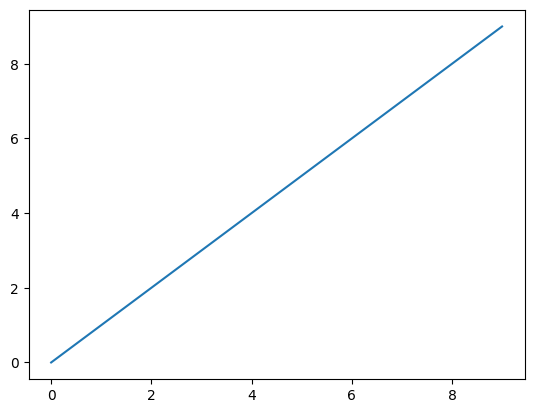

In [183]:
plt.plot(data)

### Figures and Subplots


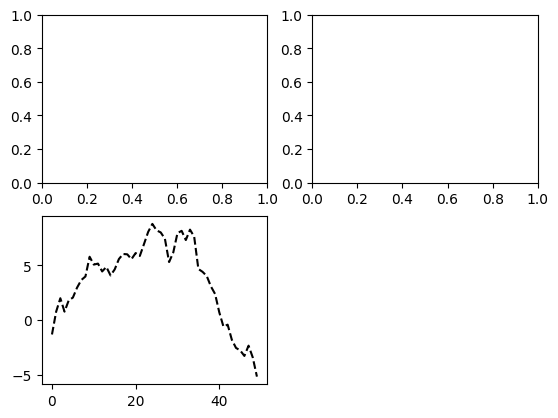

In [184]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
# One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.

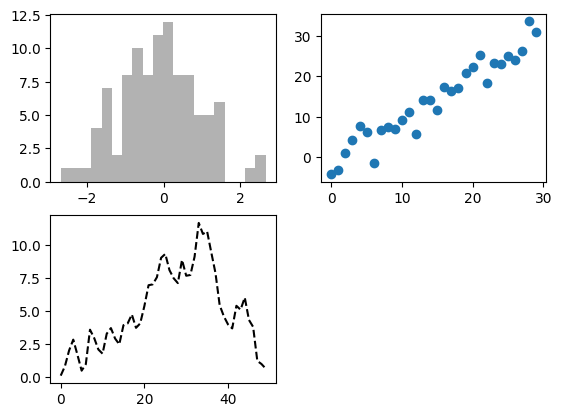

In [185]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

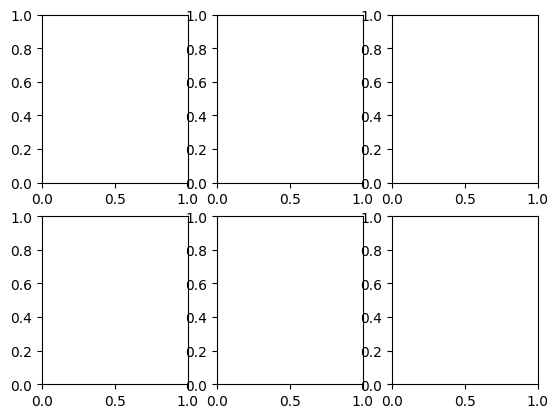

In [186]:
fig, axes = plt.subplots(2, 3)
axes

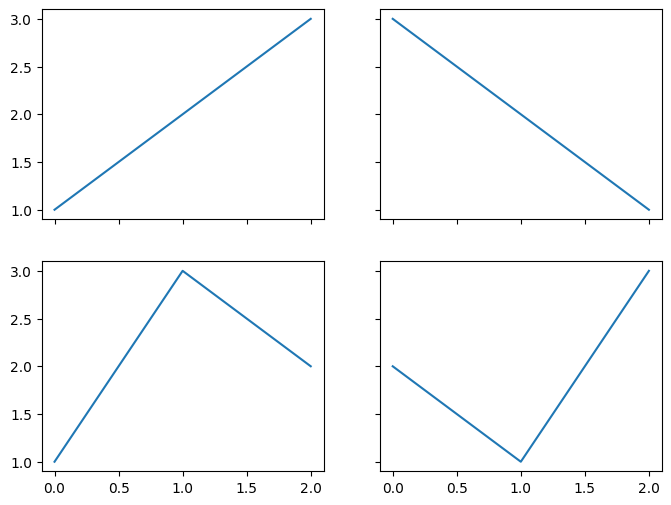

In [187]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6))

axes[0, 0].plot([1, 2, 3])
axes[0, 1].plot([3, 2, 1])
axes[1, 0].plot([1, 3, 2])
axes[1, 1].plot([2, 1, 3])

### Adjusting the spacing around subplots


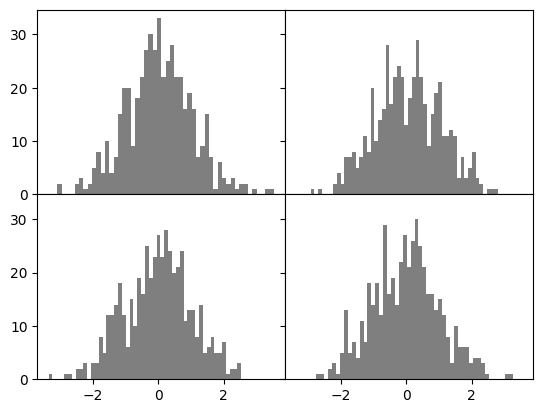

In [188]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles


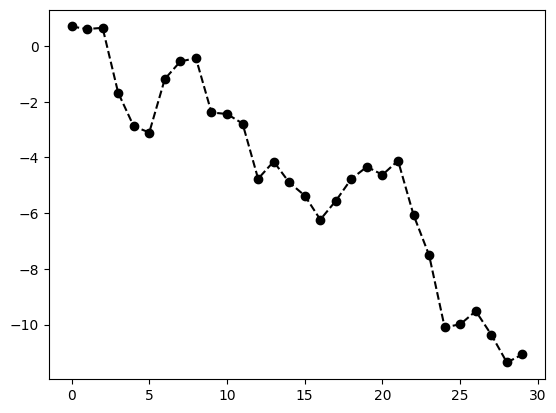

In [189]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.random.standard_normal(30).cumsum(),
    color="black",
    linestyle="dashed",
    marker="o",
)

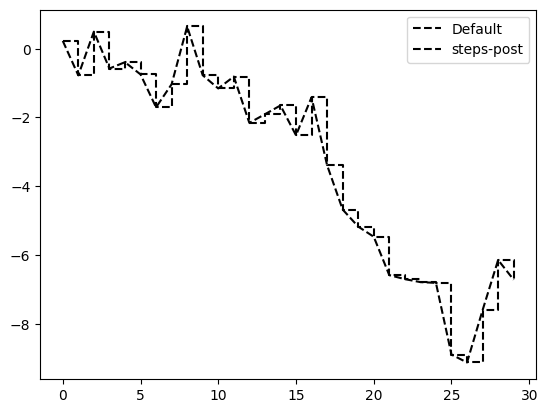

In [190]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(
    data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post"
)
ax.legend()

### Ticks, Labels, and Legends


Text(0.5, 1.0, 'My First Matplotlib Plot')

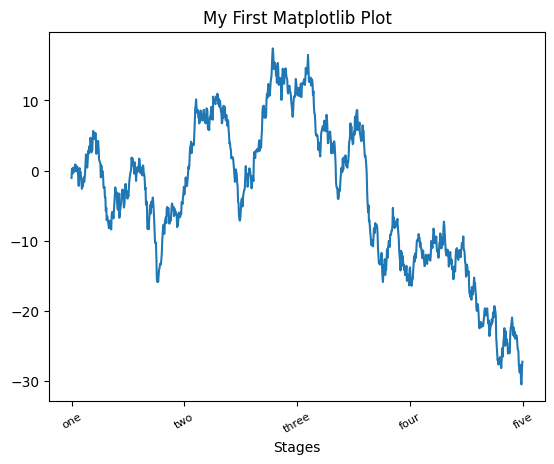

In [191]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)
ax.set_xlabel("Stages")
ax.set_title("My First Matplotlib Plot")
# ax.set(title="My first matplotlib plot", xlabel="Stages")

#### Adding legends


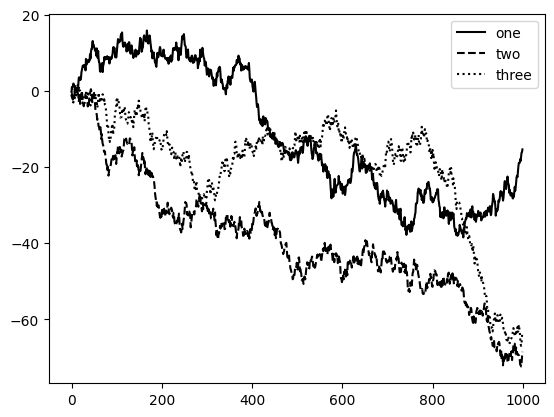

In [192]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum(), color="black", label="one")
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="two",
    linestyle="dashed",
)
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="three",
    linestyle="dotted",
)
ax.legend()

### Annotations and Drawing on a Subplot


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

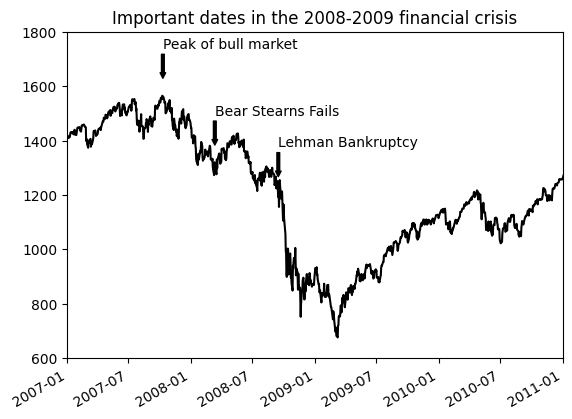

In [193]:
from datetime import datetime

fig, ax = plt.subplots()
data = pd.read_csv("ch09/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="black")
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]
for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )
    # Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

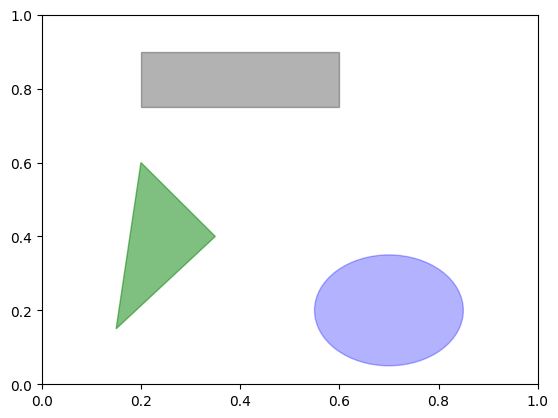

In [194]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# Saving Plots to File
fig.savefig("figpath.png")
fig.savefig("figpath1.png", dpi=400)


### matplotlib Configuration

In [195]:
# plt.rcParams
plt.rc("figure", figsize=(10, 10))
plt.rc("font", family="monospace", weight="bold", size=8)
plt.rcdefaults()  # reset to default